In [1]:
%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [31]:
import matplotlib.pyplot as plt

In [38]:
def get_data_subset(dictionary, selectors, verbose=True):

    output_dictionary = dictionary.copy()
    for key, value in selectors.items():
        for mouse_id in dictionary.keys():
            try:
                if output_dictionary[mouse_id][key] != value:
                    output_dictionary.pop(mouse_id)
            except KeyError: pass

    if verbose:
        print("{} items in output dictionary".format(len(output_dictionary.keys())))
    
    return output_dictionary

def get_data_fields(dictionary, fields, selectors):

    output_list = []
    reduced_dictionary = get_data_subset(dictionary, selectors)
    
    if len(reduced_dictionary.keys()) > 0:

        for field in fields:
            output_sublist =[]
            try:
                for key in reduced_dictionary.keys():
                    output_sublist.append(reduced_dictionary[key][field])
            except KeyError:
                print("{} is not a key in selected dictionary".format(field))
                return
            output_list.append(output_sublist)
    else:
        print("No data in fields in selected dictionary")

    if len(output_list) == 1:
        output_list = output_list[0]
        
    return output_list


In [42]:
data = get_data_fields(mice, ["grain_avg_pellets", "pr_avg_pellets", "nr_avg_pellets"], {"order": 1, "sex": "M"})

print(data)

6 items in output dictionary
[[255.66666666666666, 258.0, 235.0, 231.66666666666666, 267.0, 229.66666666666666], [182.57142857142858, 155.57142857142858, 206.14285714285714, 184.71428571428572, 200.42857142857142, 234.85714285714286], [187.85714285714286, 185.0, 189.71428571428572, 202.14285714285714, 196.14285714285714, 204.14285714285714]]


6 items in output dictionary
6 items in output dictionary


<AxesSubplot:>

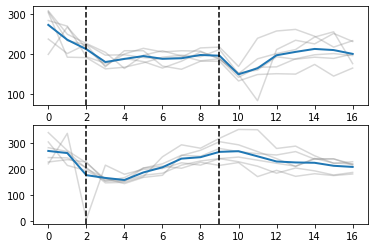

In [46]:
# total pellets
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

# ax[0].text(1, 20, "grain", ha="center")
# ax[0].text(5, 20, "PR", ha="center")
# ax[0].text(13, 20, "NR", ha="center")

nrpr_selector = {"order": 1, "sex": "M"}
prnr_selector = {"order": 2, "sex": "M"}

nrpr = get_data_fields(mice, ["all_pellets_per_day"], nrpr_selector)
prnr = get_data_fields(mice, ["all_pellets_per_day"], prnr_selector)

f, ax = plt.subplots(nrows=2)

timeline_fig(nrpr, ax=ax[0])
timeline_fig(prnr, ax=ax[1])

6 items in output dictionary
6 items in output dictionary


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

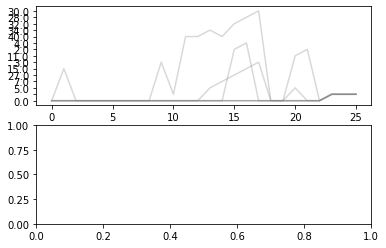

In [49]:
nrpr_selector = {"order": 1, "sex": "M"}
prnr_selector = {"order": 2, "sex": "M"}

nrpr = get_data_fields(mice, ["hoarding"], nrpr_selector)
prnr = get_data_fields(mice, ["hoarding"], prnr_selector)

f, ax = plt.subplots(nrows=2)

timeline_fig(nrpr, ax=ax[0])
timeline_fig(prnr, ax=ax[1])

6 items in output dictionary
6 items in output dictionary


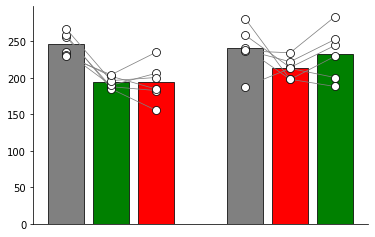

In [52]:
nrpr_avg = get_data_fields(mice, ["grain_avg_pellets", "nr_avg_pellets", "pr_avg_pellets"], nrpr_selector)
prnr_avg = get_data_fields(mice, ["grain_avg_pellets", "pr_avg_pellets", "nr_avg_pellets"], prnr_selector)

import trompy as tp

f, ax = plt.subplots()
_ = tp.barscatter([nrpr_avg, prnr_avg], ax=ax, paired=True,
barfacecolor_option="individual", barfacecolor=["grey", "green", "red", "grey", "red", "green"])
ax.set_ylabel("Pellets eaten")

# f.savefig(figsfolder + "pellets_eaten.pdf")


In [50]:
nrpr

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '',
  '',
  ''],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '',
  '',
  ''],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  7.0,
  27.0,
  15.0,
  3.0,
  0.0,
  0.0,
  11.0,
  2.0,
  0.0,
  '',
  '',
  ''],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '',
  '',
  ''],
 [0.0,
  15.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  4.0,
  0.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  '',
  '',
  ''],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  '',
  40.0,
  40.0,
  34

In [37]:
mice["FEDXA01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day'])